## <span style="color:#4375c7">DAI</span>
***
*Course materials are for educational purposes only. Nothing contained herein should be considered investment advice or an opinion regarding the suitability of any security. For more information about this course, please contact us.*
***


## Introduction to Machine Learning 
As an application of artificial intelligence (AI), machine learning is the science of giving systems or computers the ability to **automatically learn to make decisions from data** and improve from experience without being explicitly programmed. In recent years, machine learning has become part of our everyday lives. Examples include:

- Spam detection 
- Product recommendation 
- Medical diagnosis
- Image recognition

There are several types of machine learning that we will discover in our course:

- Supervised learning
- Unsupervised learning
- Reinforcement learning
- Deep learning

At the beginning of this course, we focus on the difference between supervised and unsupervised learning, and by the end of the semester, we move on to deep learning (i.e., using powerful neural networks). 

In contrast to supervised learning, where we study labeled data, unsupervised learning algorithms are used when the data is neither classified nor labeled, and thus help to explore hidden patterns in the data. 

Reinforcement learning is different from supervised and unsupervised learning: the idea is to train an agent that takes actions in an environment and learns from mistakes. The agent optimizes its behavior based on rewards and penalties. 


### Session contents:
1. **[Supervised Learning - Regression](#sl)**
    - [Data collection](#data)
    - [Regression modelling](#reg)
    - [Training and Testing data](#tts)
    - [Cross-Validation](#cv)
    - [Regularized Regression](#rr)        
    - [Hyperparameter tuning](#ht)

    
2. **[Hands-on session](#ho)**
***

# Supervised Learning - Regression <a name="sl"></a> 

n supervised learning tasks, we have labeled data to predict a **target variable** (dependent variable) using predictor variables or **features** (independent variables). There are two different types of machine learning:

- **regression** (the target variable is a continous variable)

- **classification** (the target variable is categorical e.g. default, non-default of a company)


In this lecture, we will focus on regression using supervised learning algorithms. In general, the process of solving any machine learning task is as follows:


- Data collection
- Preprocessing the data (cleaning, preparing or even dimensionality reduction)
- Fit and train the model 
- Evaluate the model's performance
- Tune hyperparameters to boost the model's performance 

In this course, we will use **[scikit-learn](https://scikit-learn.org/stable/index.html)** for analysis. Sklearn is one of the most widely used Python libraries for solving machine learning problems. As an introductory example, we will use the [Boston house-prices dataset](https://scikit-learn.org/stable/modules/classes.html?highlight=dataset#module-sklearn.datasets) from the Sklearn library to investigate which features (e.g., per capita crime rate by city) have an impact on house prices.


### Data collection  <a id='data'></a>
We load the Boston house price dataset from Sklearn and examine its features and its target variable. The dataset contains 14 variables, one of which is the median value of owner-occupied homes in $1000's, which is our target variable. The remaining variables are considered as feature variables [1,2].

In [19]:
!pip install -r https://raw.githubusercontent.com/firrm/DAI/main/requirements.txt #ensure that the required packages are installed
## import libraries 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# What happened with the Boston house price dataset?
A lesson on evolution of science.


In [20]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
## load dataset and inspect the data
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.data.shape)
print(housing.feature_names)

More information about the variables:

As you have learned so far, plotting your data is important to get a first impression of the data set. In a scatterplot, we first examine the relationship between the value of Boston's house prices and the \% lower status of the population.

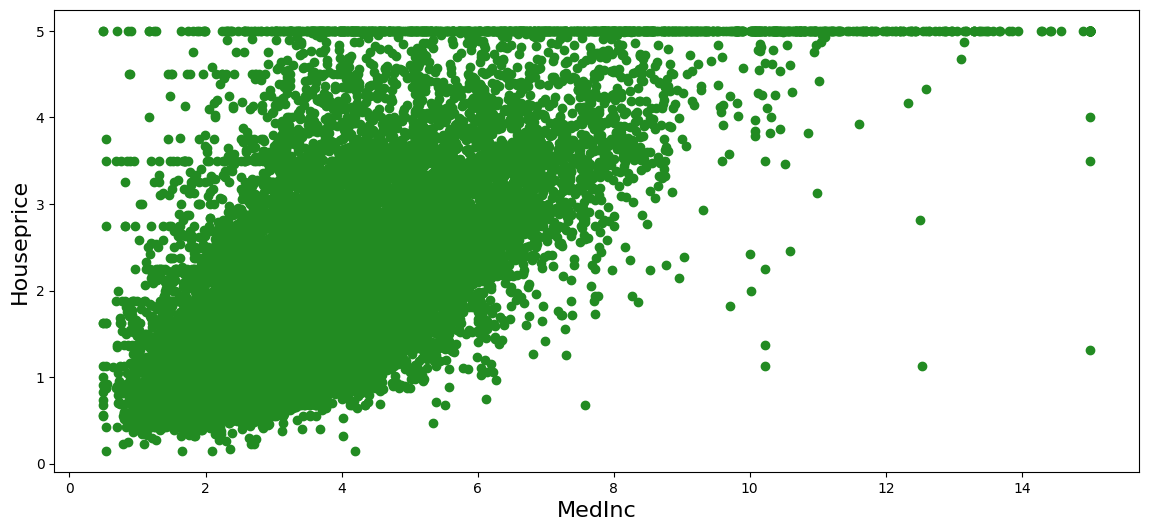

In [21]:
## plot the data
plt.rcParams['figure.figsize'] = [14, 6] #set figure width, height
plt.xlabel('MedInc', fontsize=16)
plt.ylabel('Houseprice', fontsize=16)
plt.scatter(housing.data[:,0],housing.target,color='forestgreen')
plt.show()

### Regression modelling <a id='reg'></a>
We consider the following multiple regression model:

\begin{align}
y_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \dots + \beta_k x_{ki} + \epsilon_i
\end{align}

where
- $y$ is the target variable
- $x_1,\dots,x_K$ are features or predictor variables
- $\epsilon$ is the unobservable random error term
- $\beta_0 ,\beta_1 ,\beta_2 ,\dots,\beta_k$ are the coefficients to be estimated.
 
We want to fit a model to the data that minimizes a given loss function. In the case of linear regression, we minimize the residual sum of squares (RSS) to estimate the regression coefficients.

\begin{align}
RSS = \sum_{i=1}^{n} \left( y_i- \beta_0 - \sum_{l=1}^{k} \beta_l x_{li} \right)^2
\end{align}

<br/><br/>

### Training and Testing data: <a id='tts'></a>

Our goal is to build a machine learning model that performs multivariate linear regression. Before we can make predictions with our regression model, we need to verify that our model is working properly. To evaluate the performance of the model, we feed the model with unseen data. This procedure is also called **train-test-split**, where we split our data into a **training set to build the model** and a **test set to evaluate the model** [3].

Now split the data into a training and a test set using Sklearn's `train_test_split` function. It shuffles and splits the data automatically. Fit your model to the training data and make predictions using your test data. Calculate the $R^2$ and the Root Mean Squared Error (RMSE).

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## train test split
x_train, x_test, y_train, y_test = train_test_split(housing.data , housing.target, 
                                                    test_size=0.2, random_state=11)
## fit the regression model
regression = LinearRegression()
regression.fit(x_train, y_train)                 

## make predictions on the test set
prediction = regression.predict(x_test)           

## calculate the R squared
from sklearn.metrics import mean_squared_error
r_squared = regression.score(x_test, y_test)      
print("R squared: {}".format(round(r_squared,4)))

## calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test,prediction))
print("Root Mean Squared Error: {}".format(rmse))

R squared: 0.6058
Root Mean Squared Error: 0.7283172998095423


### Cross-Validation <a id='cv'></a>
Although splitting data into a training and a test set is commonly used, it is particularly sensitive to how the data is split. 
Therefore, we use the cross-validation technique to split the data into training and test sets multiple times, and thus train and test multiple models. For example, 5-fold cross-validation means that we make 5 splits into training and test sets and then evaluate the performance of each model. Note that more folds come with higher computational cost, but more train-test splits will generally improve the performance of our model. [3]


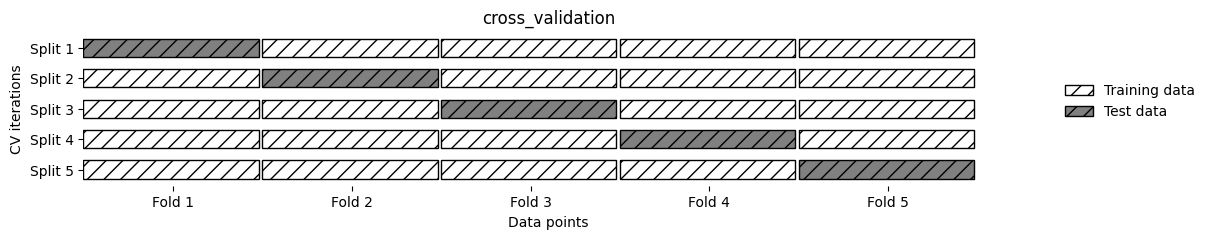

In [26]:
import mglearn 
## cross validation procedure [3]
mglearn.plots.plot_cross_validation()

In [27]:
from sklearn.model_selection import cross_val_score

## fit the regression model
regression = LinearRegression()

## 10-fold cross-validation 
cross_validation = cross_val_score(regression, housing.data , housing.target, cv=10)
                        
## average 10-fold cross-validation score
print("%0.2f accuracy with a standard deviation of %0.2f" % (cross_validation.mean(), cross_validation.std()))

0.51 accuracy with a standard deviation of 0.06


### Regularized Regression <a id='rr'></a>
As discussed above, we estimate coefficients for each variable $x_1,\dots,x_K$ in linear regression. If we do not constrain the coefficients, we may face the problem of **overfitting** due to really large coefficients. Overfitting means that our model or analysis is too close to the training data set and therefore may perform worse when applied to unseen data. In general, we face a trade-off between model complexity and training/testing accuracy. *(The figure below is taken from Müller (2016).)*.    



<br></br>
<img src="https://github.com/firrm/DAI/blob/main/assets/of.png" alt="Drawing" style="width: 550px;"/>
<br/><br/>


**Ridge Regression**

Regularization is a form of regression used to avoid the risk of overfitting. Regularization constrains or shrinks the coefficient estimates toward zero.

<br></br>


\begin{align}
RSS_{ridge} = \sum_{i=1}^{n} \left( y_i- \beta_0 - \sum_{l=1}^{k} \beta_l x_{li} \right)^2 + \lambda \sum_{l=1}^{k} \beta_j^2
\end{align}

<br></br>


In ridge regression (also known as *L2 regularization*), we add a penalty term to the basic OLS loss function. If we want to minimize this loss function $RSS_{ridge}$, the coefficients must be small. This means that ridge regression prevents the regression coefficients from increasing too much (which could lead to the problem of overfitting [3]). 


If $\lambda=0$, we obtain basic OLS. However, if $\lambda$ is large, coefficients are heavily penalized and this could lead to **underfitting** the data. As you might notice, it is tricky to choose an appropriate model complexity parameter $\lambda$. This is called **hyperparameter tuning** [3].


Following Müller (2016), we illustrate the effect of regularization by fixing the hyperparameter $\lambda$ but modifying the amount of training data. As an example, we consider the Boston housing price dataset and perform a linear regression and a ridge regression, where $\lambda = 1$, on data subsamples of increasing size. We use the `mglearn` library below.

For both regression models, the training score is obviously higher than the test score for all subsamples. However, the test score of the ridge regression is higher, especially for small data sets [3]. 

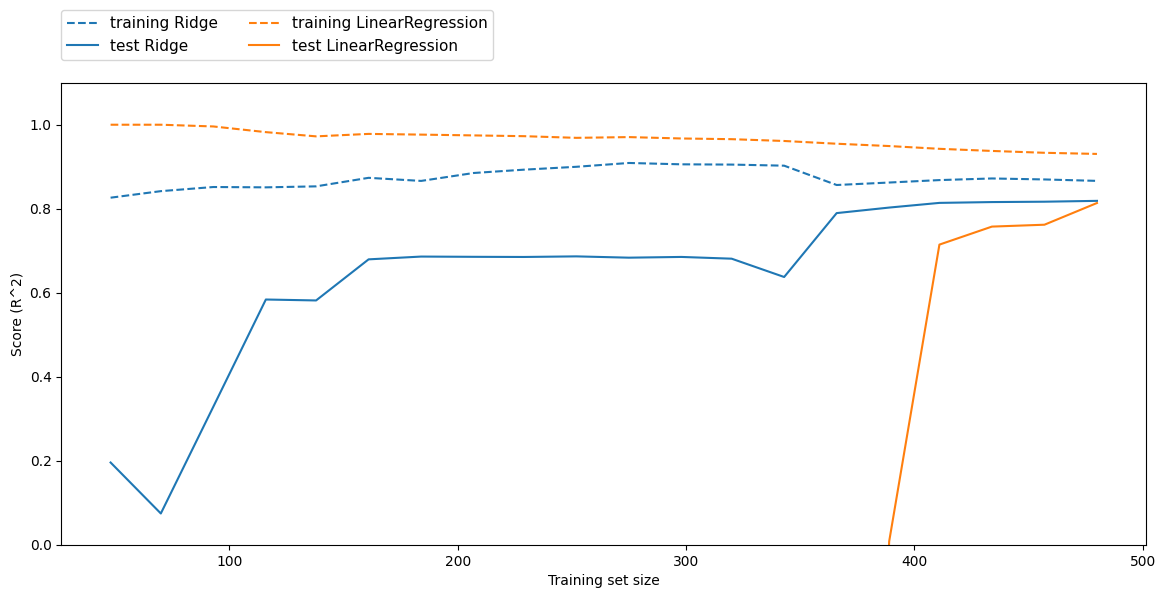

In [28]:
## learning curves for linear regression and ridge regression [3]
mglearn.plots.plot_ridge_n_samples()

**Lasso Regression**


Another example of regularization is the so-called Lasso regression, often denoted as L1 regularization. The loss function is defined as follows:

<br></br>


\begin{align}
RSS_{lasso} = \sum_{i=1}^{n} \left( y_i- \beta_0 - \sum_{l=1}^{k} \beta_l x_{li} \right)^2 + \lambda \sum_{l=1}^{k} |\beta_j|
\end{align}

<br></br>

The difference between lasso and ridge regression is that lasso only shrinks the less important regression coefficients to zero. This is why lasso regression is often used for **feature selection**, which is one of the most important challenges in the field of machine learning.

As an example, we fit a lasso regression to the Boston housing price dataset. As the results show, the most important feature or predictor of house prices is the number of rooms *RM*:

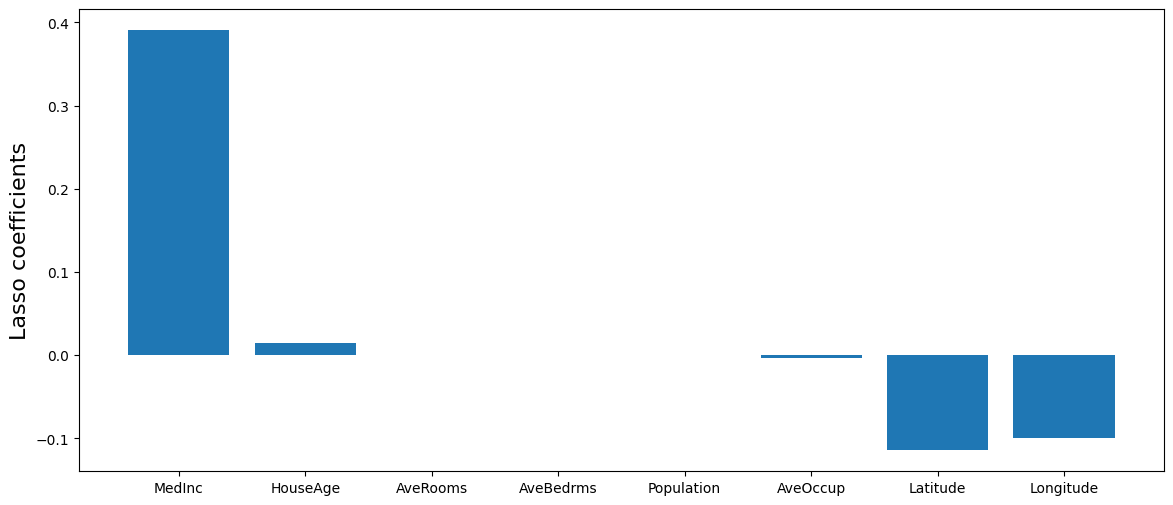

In [29]:
from sklearn.linear_model import Lasso

## fit the lasso regression model
lasso_regression = Lasso(alpha=0.1)
coefficients = lasso_regression.fit(housing.data , housing.target).coef_        

## plot the lasso coefficients
plt.rcParams['figure.figsize'] = [14, 6] #set figure width, height
plt.ylabel('Lasso coefficients', fontsize=16)
plt.bar(housing.feature_names, coefficients)
plt.show()

### Hyperparameter tuning <a id='ht'></a>
As discussed above, we want to estimate coefficients for lasso and ridge regression. In the ridge and lasso regression models, we need to select the $\lambda$ parameter in the penalty function. Such parameters are called **hyperparameters**. To build a powerful model, we need to choose the "correct" hyperparameters. In practice, we test many different values and evaluate the performance of each model, and then choose the "best" hyperparameters for our problem set. This process is also called **hyperparameter tuning**. 

We use a method called **grid search**, which tests all possible combinations of the hyperparameters of interest. According to Müller (2016), the process of performing a grid search is as shown below. Sklearn provides grid search with cross-validation as it is commonly used for tuning parameters.

A standard grid search can be computationally expensive depending on the number of parameters. Sklearn offers a solution called **Randomized Grid Search**. Unlike the basic grid search with cross-validation, it does not test all parameters, but instead samples a fixed number of parameter settings from the specified distributions [1].

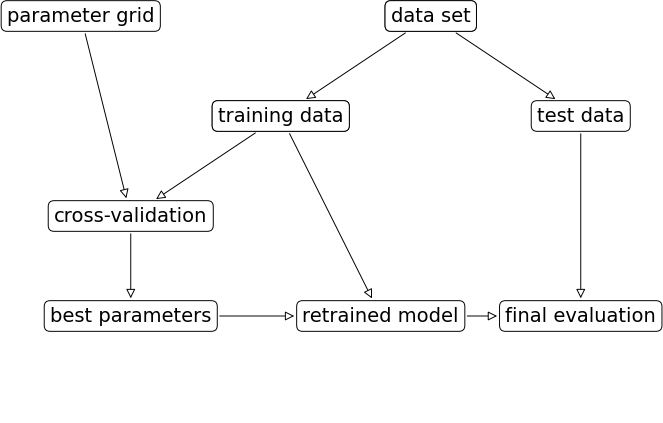

In [30]:
## procedure of parameter selection and model evaluation with grid search and cross-validation [3]
mglearn.plots.plot_grid_search_overview()

### Session takeaways 

*What have we learned in this session?*

- We know the difference between supervised and unsupervised learning
- We understand the problem of overfitting and underfitting 
- We are able to perform train-test-splits, cross-validation and regularized regression
- We can use tools for feature selection and hyperparameter tuning

*What next?*

During the hands-on session, you will implement your first supervised learning algorithms with applications to financial data. You will evaluate the performance of your model and improve your model using the techniques you learned.
***


### References
***

[1] Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., & Vanderplas, J. (2011). Scikit-learn: Machine learning in Python. the Journal of machine Learning research, 12, 2825-2830.

[2] Garreta, R., & Moncecchi, G. (2013). Learning scikit-learn: machine learning in python. Packt Publishing Ltd.

[3] Müller, A. C., & Guido, S. (2016). Introduction to machine learning with Python: a guide for data scientists. " O'Reilly Media, Inc.".